# Introduction to Calculus 

In this notebook, you will be introduced to Ordinary Derivatives and multi-dimensional derivatives knowns Gradients. 

This notebook assumes that you've never taken a Calculus course before. However, even if you have, reviewing this material will be of great help to re-kindle your memory in preparation for the lesson on Gradient Descent and back-propagation in Sprint 2 Module 2. 

## Learning Objectives 

By the end of the notebook students will be able to explain the following in their own words

- The concept of a Derivative 
- Differential notation $\frac{dy}{dx}$ 
- The Gradient operator $\nabla$ 
- The notation of partial derivatives ${\displaystyle {\frac {\partial f}{\partial x}}\mathbf {i} +{\frac {\partial f}{\partial y}}\mathbf {j} }$
- Using Tensorflow's GradientTape to take derivatives 
- The relationship between 3D surfaces and 2D contour maps 
- The Chain Rule in Calculus

----

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.lib.display import YouTubeVideo
%matplotlib inline

### What this video on The Essence of Calculus 

The take away from this video is to develop a conceptual understanding of Calculus before we dive into the notation in the next video. 

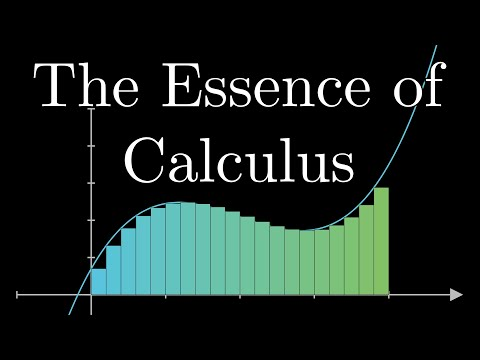

In [15]:
YouTubeVideo('WUvTyaaNkzM',  width=1000, height=500)

# Personal Note:
We can think of hard mathematical problems as the 'sum of many small values,' such as the application of infinitisemals in solving Zeno's Paradox.

A derivative is a measure of how sensitive a function is to small channges in it's input. We care about derivatives because they help us solve problems as they are the key to solving integral questions, problems that require finding the area under a curve. 

As I gain more experience with calculus, where despite not knowing exactly what a function is, I'll come to intuitively grasp that it's derivitive is x2 (x squared) and from that reverse engineer what the function must be.

This back and forth between integrals and , where the derivative of a function under a graph, gives you back the function for finding the graph itself. This is called the **Fundamental Theorem of Calculus.** It ties together the two ideas of integrals and derivatives by demonstrating that they're inversely related to each other.

### Watch this video on the Derivative 

Now that we have watched the previous video which helped us build a conceptual understanding of Calculus. Let's what this next video to get familiar with the notation. 

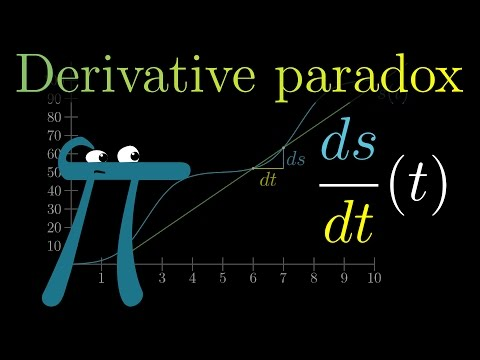

In [16]:
YouTubeVideo('9vKqVkMQHKk',  width=1000, height=500)

Ok, so now you've watched both videos and you kinda understand what a derivative is...kinda, right?

The next section is going to show us how to actually calculate the derivative of a polynomial by hand and using Tensorflow. 

In our lesson on Gradient Descent and back-propagation, tensorflow will be doing all the calculus for us. 

However, calculus is at the heart of Gradient Descent. And Gradient Descent puts the "learning" in "Machine Learning". 

### Derivative of a Polynomial 

There are many types of functions that we could apply the derivative towards but let's focus on the simplest of them all. 


Here's the general formula for an Nth degree polynomial with N many terms. **"Nth degree polynomial"** means that there are N many $x's$ in the equation. And $N$ is a variable that we select.


$$ y = f(x) = x^{n} +  x^{n-1}  + x^{n-2} +\cdots +  x^{3} + x^{2}  +  x^{1} $$


Here's the general formula for an Nth degree polynomial with just the leading Nth term.

$$ y = f(x) = x^{n}$$

Here's the general formula for the derivative of an Nth degree polynomial with just the leading Nth term.

$${\displaystyle \frac{dy}{dx}  = {\frac {d}{dx}}x^{n}=nx^{n-1}}$$

Let's take the derivative of a few commonly occurring special cases  in order to get comfortable making the mental connection between the equations and the geometry. Remember that Tensorflow will be doing the calculus for us but we need to be able to look at a plot and draw certain conclusions from it. 

### Let's define the simplist polynomial by setting $n~=~0$


Any variable to the power of zero is 1.

$$y = x^n = x^0 = 1$$

Take the derivative. 


$$ \frac{d}{dx} [y = 1 ]$$

$$ \frac{dy}{dx} = \frac{d}{dx}1 $$


$$ \frac{dy}{dx} = 0$$

**The derivative of a constant value is always zero.** In other words, the slope is a constant of zero, it doesn't change. 

In [17]:
def plot_a_flat_line():
    """
    Plots the function y = f(x) = 1
    """
    y = np.linspace(1, 1, 21)
    x = np.arange(-10, 11, 1)
    plt.figure(figsize=(15,5))
    plt.title("This is what y = 1 looks like")
    plt.grid()
    plt.plot(x, y);

The plot below is the geometry of the equation $y = f(x) = 1$

Remember that $ \frac{dy}{dx}$ can be read as $ \frac{dy}{dx} \approx \frac{\text{rise}}{\text{run}}$

Ask yourself, what's the value of $\text{rise}$?

It's zero for a flat line. Hence the derivative is zero. 

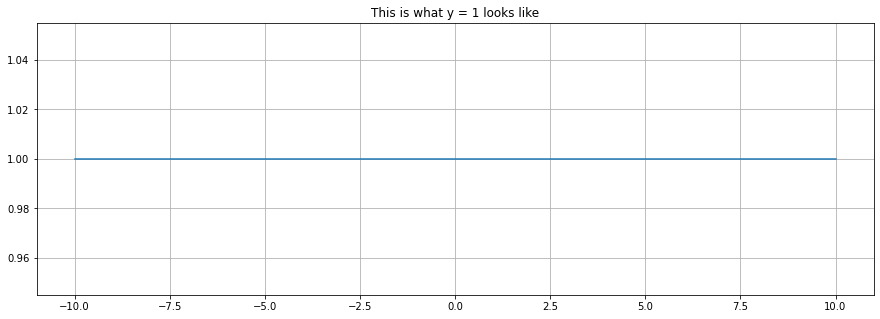

In [18]:
plot_a_flat_line()

----
## Let's set $n~=~1$

$$y = x^n = x^1$$

Take the derivative.

$$ \frac{d}{dx} [y = x ]$$

$$ \frac{dy}{dx} = \frac{d}{dx}x = 1 \cdot x^0 = 1 $$



**The derivative of a variable to the power of 1 is always 1.** In order words, the derivative of y is a constant of 1. 

In [19]:
def plot_y_equals_x():
    """
    Plots the function y = f(x) = x
    """
    # the actual values in y and x are arbitrary
    # I just thought to myself how I can plot something simple
    y = np.arange(0, 6, 1)
    x = np.arange(0, 6, 1)
    plt.figure(figsize=(15,5))
    plt.title("This is what y = 1 looks like")
    plt.xticks(x)
    plt.yticks(y)
    plt.grid()
    plt.plot(x, y);

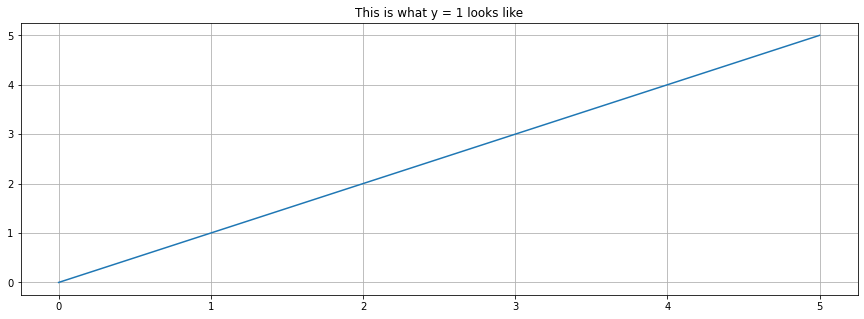

In [20]:
plot_y_equals_x()

Take a look at the plot of $y = f(x) = x$

You can read the value of the derivative from the plot by mentally filling in the values for  $ \frac{dy}{dx} \approx \frac{\text{rise}}{\text{run}}$

Do it now, count the number of steps for rise and the number of steps for run. 

You should get $\frac{\text{rise}}{\text{run}} = \frac{1}{1} = 1$

----
### Let's set $n~=~2$

$$y = x^n = x^2$$

Now let's apply the derivative operator to find the derivative of the function 

$$ \frac{d}{dx} [y = x^2 ]$$

$$ \frac{dy}{dx} = \frac{d}{dx}x^2 $$



$$ \frac{dy}{dx} = 2x^1 = 2x $$


In [21]:
def plot_parabola():
    """
    Plots the parabola, y = f(x) = x^2
    """
    # the actual values in y and x are arbitrary
    # I just thought to myself how I can plot something simple
    x = np.arange(-5, 5.25, .25)
    y = x**2
    plt.figure(figsize=(15,5))
    plt.title("This is what y = x^2 looks like")
    plt.grid()
    plt.plot(x, y);
    
def plot_parabola_derivative():
    """
    Plots the derivative of our parabola, dy/dx = 2x
    """
    # the actual values in y and x are arbitrary
    # I just thought to myself how I can plot something simple
    x = np.arange(-5, 5.30, .25)
    y = 2*x
    plt.figure(figsize=(15,5))
    plt.title("This is what y = 2x looks like")
    plt.grid()
    plt.plot(x, y);

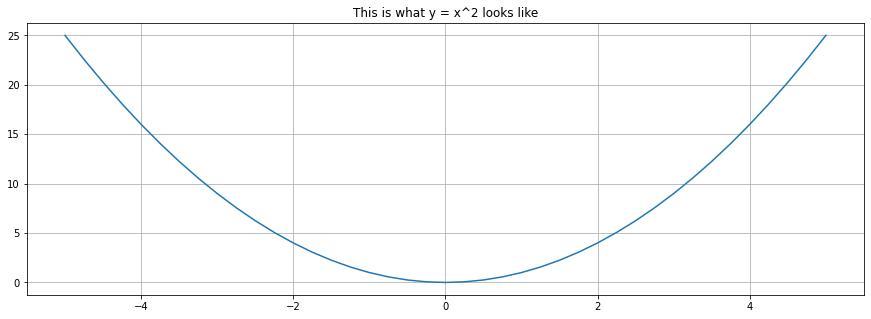

In [22]:
plot_parabola()

Looking at a plot of a parabola $y = f(x) = x^2$ and trying to eyeball the derivative isn't as straight forward as the previous plot. So let's its derivative. 

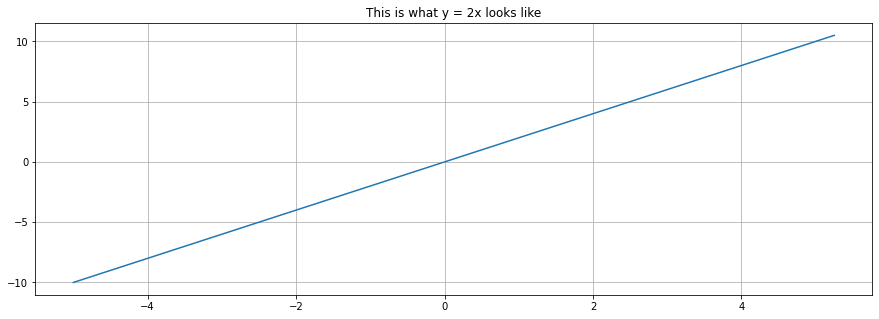

In [23]:
plot_parabola_derivative()

The line $y = f(x) = 2x$ is the general function for determining the derivate for a parabola at any point, $x$. 

I'll admit that the connection between $y = f(x) = x^2$ and $\frac{dy}{dx}  = 2x$ still doesn't seem as clear as the plot from the previous derivative we took. 

So let's plot the tangent line (i.e. the derivative) of the parabola directly on top of the parabola for a few points. 

In [24]:
# Define parabola
def f(x): 
    """
    Calculates a parabola y = f(x) = x^2
    """
    return x**2

# Define parabola derivative
def calc_dy_dx(x): 
    """
    Calculates the tangent line (i.e. the derivative) of our parabola  dy/dx = 2x
    """
    return 2*x

def tangent_line(x, x1, y1):
    """
    Formula for calculating the tagent line, y = m*(x - x1) + y1
    
    Notice that we replaced m with dy_dx because they are the same thing
    """
    return calc_dy_dx(x1)*(x - x1) + y1

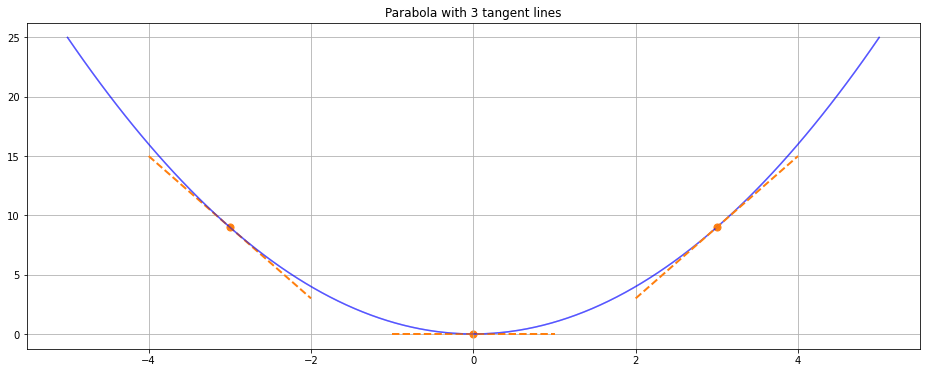

In [25]:
# Define x data range for parabola
x = np.linspace(-5,5,100)

# points on the x-axis for which we want to calculate the slope of the parabola 
X = [-3, 0, 3]
n_slopes = len(X)

# Plot the figure
plt.figure(figsize=(16,6))
plt.grid()
plt.title("Parabola with {} tangent lines".format(n_slopes))


# store dy/dx values 
dy_dx_values = []
for x1 in X:
    # Choose point to plot tangent line
    y1 = f(x1)

    # Define x data range for tangent line
    xrange = np.linspace(x1-1, x1+1, 10)
    
    # store derivate values 
    dy_dx_values.append(calc_dy_dx(x1))

    plt.plot(x, f(x), "b", alpha=0.3)
    plt.scatter(x1, y1, color='C1', s=50)
    plt.plot(xrange, tangent_line(xrange, x1, y1), 'C1--', linewidth = 2)
    
plt.show()

In [26]:
# these are the corresponding values of the derivatives of the parabola for 3 points along the x-axis
dy_dx_values

[-6, 0, 6]

Let's read this plot from left to right. 

The words slope, tangent line, derivative all mean the same thing, $$\frac{dy}{dx}$$

The first slope (i.e. derivative) is negative, it's -6. The 6 doesn't really matter what matters is the negative sign. It's telling us that the rate of change of the parabola is decreasing. Meaning that the parabola **is moving towards a minimum point in the curve.** 

The second slope is zero. This means that the parabola **is at a maximum or minimum point.**

The third slope is positive, it's 6. The important part is the it's positive. This means that **it is moving away from the minimum point of the curve.** 


You might be wondering ... 

- Why are we concerned with theses tangent lines?

- Why do we care about the slope at any given point of a parabola?

- How is this connected to Machine Learning?


This curve is the key behind Gradient Descent. But we won't make that connection explicit until the end of the notebook. 

For now, keep reading. Muahahahah!

-----
## Automatic Differentiation

We took the derivative of a few key polynomial powers because they represent the 3 special causes
- Derivative of a constant value
- Derivative of a polynomial with a power of 1 
- Derivative of a polynomial with a power greater than 1 

In practice, we don't want to have to take these derivatives by hand. Especially when the functions become much more complicated. Luckly, Tensorflow will take derivatives for us. 

Let's use Tensorflow's `GradientTape()` to take a derivative of polynomials! 

Here's the [**Tensorflow documentation**](https://www.tensorflow.org/guide/autodiff) that explains how Tensorflow's `GradientTape()` works.


In [27]:
# Tensorflow will treat `x` is a variable 
# but we still need to assign a value to it 
x = tf.constant(3.0)

In [28]:
# to convice us that Tensorflow is treating y as a function and not just as the result of squaring 3
# let's calculate the derivative for y
# we know that the derivative of y is 2x - we know because we calcualted it above 

with tf.GradientTape() as g:
    # tensorflow requires that we specify which input variable to "watch"
    g.watch(x)
    
    # now let's define y = x^2
    y = x * x

# now use the .gradient() operator to take the gradient of y = f(x)
# we need to specify the independent variable (x) and the dependent variable (y)
dy_dx = g.gradient(y, x)

In [29]:
# the derivatiet of y = x^2 is dy/dx = 2x
# 2 * (3) = 6
# and 6 is the number that we get 
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [30]:
# notice that the actual value is located inside of an array
dy_dx.numpy()

6.0

### Derivative of an Equation 

Let's take a derivative of simple equation -  a line. 

$$y = x \cdot w + b$$

What's the derivative of this line with respect to x?

Note: `"with respect to"` will be written as `wrt`

$$y = x \cdot w + b$$

$$ \frac{d}{dx} [y = x \cdot w + b]$$

$$ \frac{dy}{dx} = \frac{d}{dx}[x \cdot w + b] $$

The derivative operator gets distributed to both terms seperated by the plus sign. 
But because we are taking the derivative wrt $x$ ( hence the notation of the operator having $x$ in the demoninator) we treat all other variables as constants. 

**The derivative of a constant value is always zero.**


$$ \frac{dy}{dx} = \frac{d}{dx}x \cdot w + \frac{d}{dx}b $$

Pull the constant (i.e. $w$) in front of the derivative operator to indicate that it's not part of the derivative.

$$ \frac{dy}{dx} = w \cdot \frac{d}{dx}x  + \frac{d}{dx}b $$

$$ \frac{dy}{dx} = 1 \cdot w + 0 $$

$$ \frac{dy}{dx} =  w  $$

 $w$ is the slope of this line

In [31]:
w = tf.Variable([5.], name="w")
b = tf.Variable([10.], name='b')
x = tf.Variable([1.])

with tf.GradientTape(persistent=True) as tape:
    y = x * w + b
    
dy_dx = tape.gradient(y, x)

In [32]:
# and we see that the derivative of this line is indeed w, which has a value of 5 
dy_dx.numpy()

array([5.], dtype=float32)

**What if we want to calculate the derivative of this equation wrt w?**

Can we even do that? 

Yes, we can!
$$y = x \cdot w + b$$

$$y = x \cdot w + b$$

$$ \frac{d}{dw} [y = x \cdot w + b]$$

$$ \frac{dy}{dw} = \frac{d}{dw}[x \cdot w + b] $$

The derivative operator gets distributed to both terms seperated by the plus sign. 
But because we are taking the derivative wrt $w$ ( hence the notation of the operator having $w$ in the demoninator) we treat all other variables as constants. 

**The derivative of a constant value is always zero.**

$$ \frac{dy}{dw} = x \cdot \frac{d}{dw}w + \frac{d}{dw}b $$

$$ \frac{dy}{dw} = x \cdot 1 + 0 $$

$$ \frac{dy}{dw} =  x  $$


In [33]:
w = tf.Variable([5.], name="w")
b = tf.Variable([10.], name='b')
x = tf.Variable([1.])

with tf.GradientTape(persistent=True) as tape:
    y = x * w + b
    
dy_dw = tape.gradient(y, w)

In [34]:
# and we see that the derivative of this line is indeed x, which has a value of 1
dy_dw

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

----
## Vector Calculus

As you can see we can take the derivative between any 2 variables that we care about. Not only that, we are not limited to just 2 variables either. Which brings us to Vector Calculus. 

In Vector Calculus, the derivative operator is given a different name - it's the Gradient. And the Graident has a different notation.

Let's define $z$ as a function that has 2 dependent variables

$$z = f(x, y) = \frac{x^2}{a} + \frac{y^2}{b} ~~~~a,b \in \mathbb{R} ~~\text{a and b are real numbers}$$

This is a very special function. It's called a **paraboloid**. The paraboloid is what a parabola looks like in 3 dimenisons.



In [35]:
def plot_parabolid():
    def f(x, y):
        """
        Calculates a paraboloid z = f(x, y) = x^2/a + x^2/b
        where a and b are both 1
        """
        return x ** 2 + y ** 2

    # create values for x, y, and z
    x = np.arange(-10, 11, 1)
    y =  np.arange(-10, 11, 1)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # plot the paraboloid
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.set_title('paraboloid');

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.show()

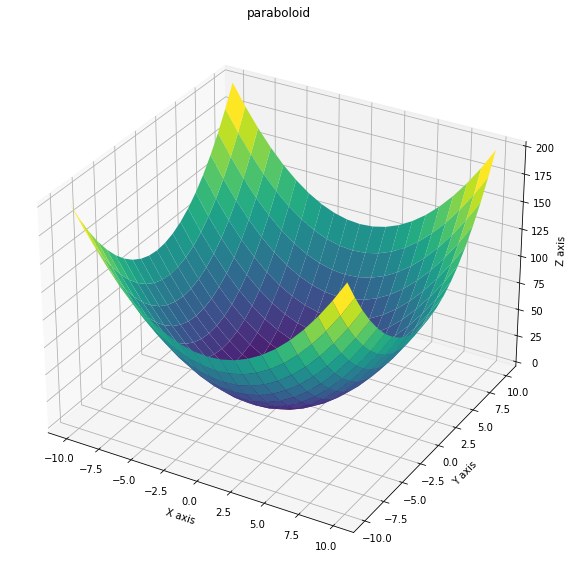

In [36]:
plot_parabolid()

We'll be using the paraboloid to study Gradient Descent, so it's important to get comfortable with it. 

### Back to the Gradient

The Gradient is an operator that operators on a function and the result is a vector where each component is a partial derivative. 

In the case of a function like $z = f(x, y)$ the gradient is 

$${\displaystyle \nabla f={\frac {\partial f}{\partial x}}\mathbf {i} +{\frac {\partial f}{\partial y}}\mathbf {j} }$$

$~\mathbf{i} ~~ \text{and}~~ \mathbf {j} ~$ are basis vectors that stand in for the $x$ and $y$ axis, respectively.

The way to read the gradient conponents are as follow:

$\frac{\partial f}{\partial x}$ represents how $z$ changes in the $x$ direction

$\frac{\partial f}{\partial y}$ represents how $z$ changes in the $y$ direction

In case you're wondering, yes I am using $z$ and $f$ interchangably. Yes, you can do that.

In the previous section, we only had $x$ and $y$ and so there really wasn't a need for the concept of a partial derivative because there is only **the** derivative when you are only playing with two variables. But when you have 3 or 4 or 5 or $N$ variables then introducing the concept of a partial derivatives because very useful and necessary. 

This next videos explores the concept of a partial derivative. 

### Watch this video on Partial Derivatives

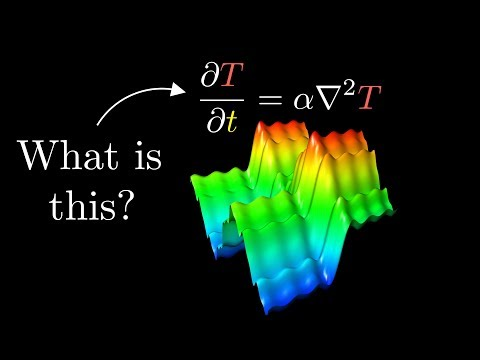

In [37]:
YouTubeVideo('ly4S0oi3Yz8',  width=1000, height=500)

### Take the Gradient

Now that we have introduced the core concepts for vector calculus, let' use Tensorflow to calculate the gradient of a paraboloid. 

Recall that the paraboloid in 3D space looks like this

$$z = f(x, y) = \frac{x^2}{a} + \frac{y^2}{b} ~~~~a,b \in \mathbb{R} ~~\text{a and b are real numbers}$$

If we set $a=b=1$ for simplicity, then we have

$$z = f(x, y) = x^2 + y^2$$




**Let's calculate the partial derivative wrt to x.** 

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{x}}[x^2 + y^2]$$

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{x}}x^2 + \frac{\partial{f}}{\partial{x}}y^2$$

$$\frac{\partial{f}}{\partial{x}} = 2x^1 + 0$$

$$\frac{\partial{f}}{\partial{x}} = 2x$$

**Let's calculate the partial derivative wrt to y.**

$$\frac{\partial{f}}{\partial{y}} = \frac{\partial{f}}{\partial{y}}[x^2 + y^2]$$

$$\frac{\partial{f}}{\partial{y}} = \frac{\partial{f}}{\partial{y}}x^2 + \frac{\partial{f}}{\partial{y}}y^2$$

$$\frac{\partial{f}}{\partial{y}} = 0 + 2y^1 $$

$$\frac{\partial{f}}{\partial{y}} = 2y$$


If you were to take a knife and cut a slice down the middle that was parallel to the x-axis and a second slice parallel to the y-axis, then you would have identical looking slices. Hence, we have identical resutls for both partial derivatives. 
 
Again, we are using $z$ and $f$ interchangably because $z = f(x, y)$

In [38]:
x = tf.Variable([[-1., 0., 1.]], name="x")
y = tf.Variable([[-1., 0., 1.]], name='y')

with tf.GradientTape(persistent=True) as tape:
    z = x**2 + y**2
    
dz_dx = tape.gradient(z, x)
dz_dy = tape.gradient(z, y)

In [39]:
# dz/dx = 2x
# thus 2x = 2 * [-1, 0, 1] = [-2, 0, 2]
dz_dx

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-2.,  0.,  2.]], dtype=float32)>

In [40]:
# dz/dy = 2y
# thus 2y = 2 * [-1, 0, 1] = [-2, 0, 2]
dz_dy

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-2.,  0.,  2.]], dtype=float32)>

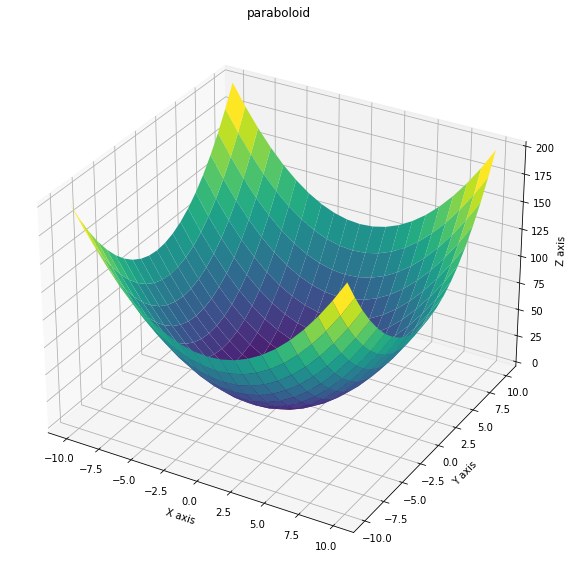

In [41]:
plot_parabolid()

----
# Gradient Descent Preview



### Our ML model is a Linear Regression 

Let's say we are training a simple Linear Regression model with one input feature, $x$.

$$\hat {y} = f(x) = x \cdot w + b $$

Where $\hat {y}$ is our model's approximation (prediction) of the true $y$ value and $w$ is the slope. 

In fact $w$ can be expressed as $$ \frac{dy}{dw} =  x  $$ which we saw earlier. 

We also saw earlier that a Gradient can be expressed as 

$${\displaystyle \nabla f={\frac {\partial f}{\partial x}}\mathbf {i} +{\frac {\partial f}{\partial y}}\mathbf {j} }$$

$~\mathbf{i} ~~ \text{and}~~ \mathbf {j} ~$ are basis vectors that stand in for the $x$ and $y$ axis, respectively.


If we take the gradient of our Linear Regression wrt to $x$, then we get 

 $$\hat y = f(x)$$


$${\displaystyle \nabla f={\frac {\partial f}{\partial x}}\mathbf {i} +{\frac {\partial f}{\partial y}}\mathbf {j} }$$


$${\displaystyle \nabla f={\frac {\partial f}{\partial x}}\mathbf {i} + 0 \mathbf {j} }$$

$${\displaystyle \nabla f={\frac {\partial f}{\partial x}} = \frac{dy}{dx}}$$


**Take Away:**
We can express the partial derivate as an ordinary derivate because they are equivalent here; there are only 2 variables and so there is only a single component to the gradient. We can keep the gradient notation $\nabla$.



### Gradient of the Loss Function 

We can take the gradient of any equation we want. 

In fact, on our lesson on Gradient Descent we'll learn that we need to take the gradient of the loss function (which measures the error in our Linear Regression's predictions). 

We'll be using the Mean Square Error loss function (loss function and error function are the exact same thing, two names for the same thing). 

$${\displaystyle \operatorname {MSE} =f(x, y, w, b )={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}.}$$

The above $\operatorname{MSE} =f(x, y, w, b )$ might make more sense if you remember that we can define $\hat {y}$ as the following 

$$\hat {y} = f(w, b) = x \cdot w + b $$

We can just define MSE as being a function of any variable in its equation $x$, $y$, $w$, or $b$. 

For Gradient Descent purposes, we are interested in relating $f$ with the model parameters $w$ and $b$.


$${\displaystyle \operatorname {MSE} =f(w)={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{{f(w, b)_{i}}})^{2}.}$$

Here's the derivative of the loss function wrt $w$.

$$  \frac{\partial f}{\partial w} = \frac{1}{n} \sum_{i} -2( y_i - (w \cdot x_i + b ))$$

here $i$ is the $ith$ data point in the data set and $n$ is the number of data points in the data set.

What this partial derivative is saying is that the gradient of the loss function is given by plugging in all the data points into the expression on the right hand side of the sigma $\sum$ which sums up the results for all the data points then taking the average by dividing by $n$. 

Once we do that, we then subtract the gradient from the whatever value $w$ is currently storing. 

$$w_{new} = w_{current} - \lambda \cdot \frac{\partial f}{\partial w} $$


Sometimes the above equation has the partial derivative symbol, sometimes it has the gradient symbol 


$$w_{new} = w_{current} - \lambda \cdot \nabla f $$

$\lambda$ is called the Learning Rate and we'll talk about in our lesson. 

**The above equation is Gradient Descent in algebraic form.**

It subtracts the gradient (the change in error wrt to the change in $w$) from the current value in $w$ and replaces it with a new value. It keeps doing this until we arrive at a value for w that minimizes the error in our model predictions. 

**Here's what Gradient Descent looks like in it's Geometric form.**


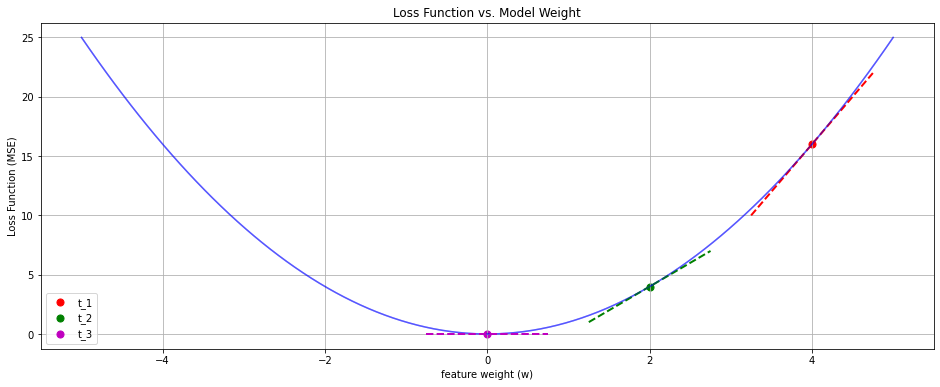

In [42]:
# points on the x-axis for which we want to calculate the slope of the parabola 
X = [4, 2, 0]
n_slopes = len(X)

# Define x data range for parabola
x = np.linspace(-5,5,100)

# Plot the figure
plt.figure(figsize=(16,6))
plt.grid()
plt.title("Loss Function vs. Model Weight")

plt.xlabel("feature weight (w)")
plt.ylabel("Loss Function (MSE)")

# store dy/dx values 
dy_dx_values = []
color = ["r", "g", "m"]
time = [1,2,3]
for x1, c, t in zip(X,color, time):
    
    # Choose point to plot tangent line
    y1 = f(x1)

    # Define x data range for tangent line
    xrange = np.linspace(x1-.75, x1+.75, 2)
    
    # store derivate values 
    dy_dx_values.append(calc_dy_dx(x1))

    plt.plot(x, f(x), "b", alpha=0.3)
    plt.scatter(x1, y1,color=c, s=50, label="t_{}".format(t))
    plt.plot(xrange, tangent_line(xrange, x1, y1), '{0}--'.format(c), linewidth = 2)

plt.legend();

The loss function for our Linear Regression model is the MSE

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}.}$$


Notice that the loss function squares all the terms, so that's how we know the loss function is a **parabola**. 


Now, let's imagine that the feature weight $w$ is being updated 3 times by gradient descent, so by this formula

$$w_{new} = w_{current} - \lambda \cdot \nabla f $$

The first update occurs at time step $1$ (the red dot in the plot). 

We pass data ($x$, $y$) through Linear Regression $\hat {y}$,  so now ($x$, $y$) have actual values. 

We take the Gradient of $\operatorname {MSE}$ then we update the value of $w_{current}$ which places it at the 4 on the horizontal number line. 

Then we repeat the process and updated the value of $w$ to 2. 

Then we repeat the process and updated the value of $w$ to 0. 

The reason why the values of $w$ are converging towards 0 is because it is $w~=~0$ that corresponds to the lowest possible error in our model predictions. 

$$w~=~0~~ \text{corresponds to} ~~\operatorname {MSE}~=~0$$ 

**When this happens we say that the value of $w$ has been optimized.**

The optimized value of a model parameter is sometimes given the special notation $\mathbf{w^*}$


-----
# Preparation for Tomorrow 

Before we conclude this notebook, I'm including several other (short) videos that you need to watch in preparation for our lesson on Gradient Descent. We will cover the Gradient on a 3D surface, 3D surfaces, representing a 3D surface as a 2D contour map, and finally the Chain Rule in Calculus. 

Watch the following videos in order to learn about the topics just mentioned. 


### The Gradient - a multi-dimensional derivative
[**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the take away. This point of this video is to help you understand the Gradient visually using 3D surfaces. 

### Contour Maps 
It is very common to visualize 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video in order to [**understand the relationship between 3D surfaces and 2D contour maps**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation 

Unlike standard Sklearn ML models, neural networks use not just Gradient Descent but also something called Back-propagation in order to learn from the data. [**In order to understand how back-propagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=9yCtWfI_Vjg). The take away here is to understand how a partial derivative can be decomposed into a product of multiple derivatives. 

-----
### Conclusion 

Ok, so what are you suppose to actually take away from this notebook, right?

You won't be asked to calculate any derivatives by hand nor will you be asked to regurgitate equations in any quiz or exam. But you will be asked to explain Gradient Descent and back-propagation in your own words at some point.

The take aways are for you to be able to explain in your own words 

- The concept of a Derivative 
- Differential notation $\frac{dy}{dx}$ 
- The Gradient operator $\nabla$ 
- The notation of partial derivatives ${\displaystyle {\frac {\partial f}{\partial x}}\mathbf {i} +{\frac {\partial f}{\partial y}}\mathbf {j} }$
- Using Tensorflow's GradientTape to take derivatives 
- The relationship between 3D surfaces and 2D contour maps 
- The Chain Rule in Calculus 

these concepts will pop up a lot in the study of **Gradient Descent**, **back-propagation**, and **Neural Networks** more broadly.